In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Mass ratios

Here, we adapt the results of [DeGrand and Neil](https://arxiv.org/abs/1910.08561) to estimate ratios of various hadronic scales for the hyper-stealth dark matter model.  We also use large-$N_D$ scaling relations, which are as follows: baryon masses scale as $N_D^1$; meson masses scale as $N_D^0$; meson decay constants scale as $\sqrt{N_D}$.

The reference gives the following parameterization in terms of $x \equiv (M_{PS} / M_V)^2$:
$$
\frac{M_N}{M_V} = \frac{920 + 1480x}{760 + 720x}
$$
and then $M_{PS} = \sqrt{x} M_V$ by definition, so 
$$
\frac{M_N}{M_{PS}} = \frac{M_N}{M_V} \frac{1}{\sqrt{x}}.
$$  

Incorporating large-N scaling and adding a factor of 2 for $\eta'$ vs. $\eta$ as suggested in the reference, we have

$$
\frac{M_{B_d}}{M_{\eta'_d}} = \frac{1}{\sqrt{x}} \frac{N_D}{6} \frac{0.92 + 1.48x}{0.76 + 0.72x}
$$

This is valid for $0.1 \leq x \leq 0.7$.  At heavier quark masses, the alternative parameterization suggested is:
$$
\frac{M_N}{M_V} = \frac{1360\ {\rm MeV}+2.92m_n}{960\ {\rm MeV} + 1.71m_n}
$$
for $m_n > 200$ MeV (in QCD.)  If we plug in numbers moving up from 200 MeV:

Text(0, 0.5, '${M_N}/{M_V}$')

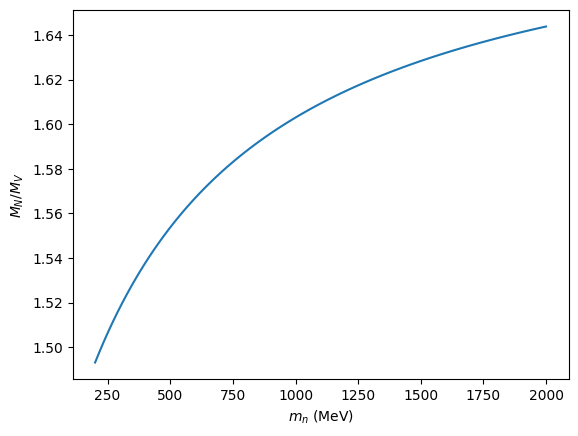

In [17]:
mn = np.linspace(200,2000,100)

def MN_ov_MV_heavy(mn, ND=4):
    return (1360 + 2.92*mn) / (960 + 1.71 * mn)

plt.plot(mn, MN_ov_MV_heavy(mn))
plt.xlabel('$m_n$ (MeV)')
plt.ylabel(r'${M_N}/{M_V}$')

we see that this ratio varies from about 1.5 to slightly above.  This matches the expected heavy-quark limit, large-N estimate for any meson, which is $M_N / M_{\rm meson} = N_D / 2$.  To keep things simple, we adopt this latter estimate in the entire heavy-quark regime, leading to the result

$$
\frac{M_N}{M_V} = \frac{N_D}{2} \Rightarrow \frac{M_N}{M_{PS}} = \frac{N_D}{2} \frac{1}{\sqrt{x}}.
$$

In the heavy-quark regime we don't include the extra factor of 2 for $\eta'$ as above, since it would give the wrong heavy-quark limit (in which all meson masses, including $\eta'$, should be $2m_q$.)  We thus have our final formula:
$$
\frac{M_{B_d}}{M_{\eta'_d}} = \begin{cases}
\frac{1}{\sqrt{x}} \frac{N_D}{6} \frac{0.92 + 1.48x}{0.76 + 0.72x},& 0.1 \leq x \leq 0.7; \\
\frac{N_D}{2\sqrt{x}},& 0.7 < x \leq 1.0.
\end{cases}
$$

In [28]:
def MB_ov_Meta(x, ND=4):
    r = np.zeros_like(x)
    
    r[x<0.1] = 0
    mid_mask = np.logical_and(0.1 <= x, x <= 0.7)
    hi_mask = x > 0.7
    r[mid_mask] = 1 / np.sqrt(x[mid_mask]) * (ND/6) * (0.92 + 1.48*x[mid_mask]) / (0.76 + 0.72*x[mid_mask])
    r[hi_mask] = (ND/2) / np.sqrt(x[hi_mask])
    return r


Text(0, 0.5, "$M_{B_d}/M_{\\eta'}$")

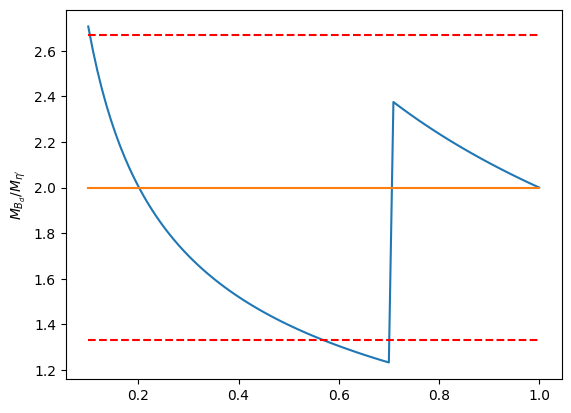

In [29]:
x = np.linspace(0.1,1,100)
ND_test=4
sigma=ND_test/6

plt.plot(x, MB_ov_Meta(x, ND=ND_test))

plt.plot(x,np.ones_like(x)*ND_test/2)
plt.plot(x,np.ones_like(x)*(ND_test/2-sigma),ls='--',color='r')
plt.plot(x,np.ones_like(x)*(ND_test/2+sigma),ls='--',color='r')


plt.ylabel("$M_{B_d}/M_{\eta'}$")

This isn't a great model in detail - in particular we haven't been very careful about the threshold at $x = 0.7$ where a large discontinuity is evident.  Still, we're only interested in the gross features, specifically the overall range.  From above, over the entire mass range from $x=0.1$ up to very heavy quark masses, the average value of the ratio is just

$$
\frac{M_{B_d}}{M_{\eta'}} = \frac{N_D}{2}
$$

with an error band of $N_D/6$; in other words, $N_D/3 \leq M_{B_d}/M_{\eta'} \leq 2N_D/3$.


### Other mesons

As a proxy for other intermediate mesons, we also want the ratio $M_N / M_V$ itself.  From above, we can construct a joint model as:

$$
\frac{M_{B_d}}{M_V} = \begin{cases}
\frac{N_D}{3} \frac{920 + 1480x}{760 + 720x}, & 0.1 \leq x \leq 0.7; \\
\frac{N_D}{2}, & 0.7 \leq x \leq 1.0.
\end{cases}
$$

In [31]:
def MB_ov_MV(x, ND=4):
    r = np.zeros_like(x)
    
    r[x<0.1] = 0
    mid_mask = np.logical_and(0.1 <= x, x <= 0.7)
    hi_mask = x > 0.7

    r[mid_mask] = (ND/3) * (0.92 + 1.48*x[mid_mask]) / (0.76 + 0.72*x[mid_mask])
    r[hi_mask] = (ND/2)
    
    return r

Text(0, 0.5, "$M_{B_d}/M_{\\eta'}$")

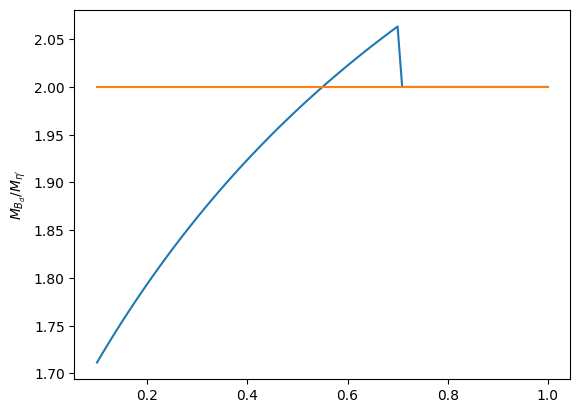

In [34]:
x = np.linspace(0.1,1,100)
ND_test=4

plt.plot(x, MB_ov_MV(x, ND=ND_test))
plt.plot(x,np.ones_like(x)*ND_test/2)

plt.ylabel("$M_{B_d}/M_{\eta'}$")

The variation is small enough that we can simply adopt $M_{B_d} / M_V \approx N_D / 2$ over the full mass range.

### Decay constant

We should also estimate the decay constant $f_{\eta'}$.  Without a direct estimate of this, the best we can do (from DeGrand and Neil) is to use the pion decay constant $f_{PS}$.  They include the formula for $0.1 \leq x \leq 0.7$:

$$
\frac{M_{PS}^2}{f_{PS}^2} = 1.61 + 4.86x
$$

and then simply $M_{PS} / f_{PS} \approx 2$ at heavier mass.  Again, we can presume large-$N$ scaling which gives $M_{PS} \sim N_D^0$ and $f_{PS} \sim \sqrt{N_D}$, so:

$$
f_{\eta'} = \sqrt{\frac{N_D}{3}} \frac{1}{\sqrt{1.61+4.86x}} M_{\eta'}
$$
at light mass, and $f_{\eta'} = 0.5 \sqrt{N_D/3} M_{\eta'}$ at heavy mass.  Let's plot:


In [5]:
def feta_ov_meta(x, ND=4):
    r = np.zeros_like(x)
    
    r[x<0.1] = 0
    mid_mask = np.logical_and(0.1 <= x, x <= 0.7)
    hi_mask = x > 0.7
    r[mid_mask] = np.sqrt(ND/3) * 1 / np.sqrt(1.61+4.86*x[mid_mask])
    r[hi_mask] = 0.5 * np.sqrt(ND/3)
    
    return r
    

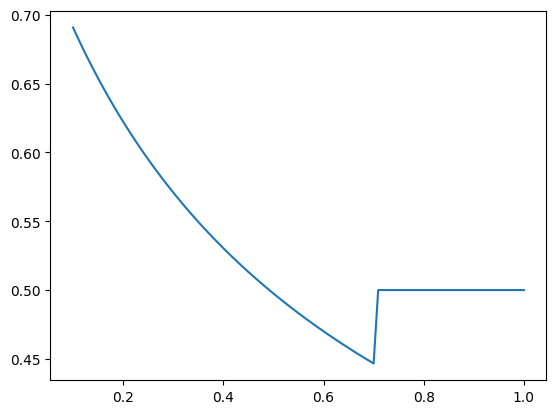

In [8]:
x = np.linspace(0.1,1,100)
ND_test=3

plt.plot(x, feta_ov_meta(x, ND=ND_test))

The variation in this quantity is small enough that it suggests simply adopting the heavy-mass result:

$$
\frac{f_{\eta'}}{M_{\eta'}} \approx \frac{1}{2} \sqrt{\frac{N_D}{3}}.
$$

## Quark mass

Here we estimate the ratio $M_{B_d} / m_n$ of the baryon mass to the quark mass.  In the heavy-quark limit, the baryon mass is simply equal to the sum of the quark masses, and we recover the large-$N$ result,
$$
\frac{M_{B_d}}{m_n} \rightarrow N_D.
$$

In the light-quark limit, this ratio can become very large.  For our modeling of mass ranges, we have fixed the lightest quark masses we will consider as the point $M_{\eta'_d}^2 / M_V^2 = 0.1$.  From page 11 of the reference (arXiv version), this corresponds in QCD to a quark mass of $m_n \sim 20$ MeV.  On the other hand, from the formula above, we have
$$
M_N(x = 0.1) = (920 + 1480x) {\rm MeV} \approx 1070\ {\rm MeV}.
$$

This leads to the result in the light-quark limit, pulling out a factor of $N_D$ to reintroduce the scaling,
$$
\frac{M_{B_d}}{m_n} \rightarrow 18 N_D.
$$

There are some technical matters we could worry about, such as the precise definition of the quark mass in the light-quark regime where it is not RG-invariant.  But this range is only used to study fine-tuning bounds which are already rather qualitative, so we don't pursue any further details and just adopt this range as noted in the paper.

## Spectrum visualization

Finally, trying to add some visualizations of the mass spectrum.

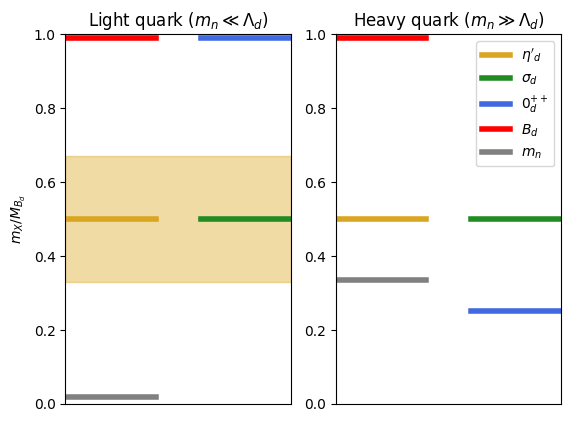

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2)

# Eta-prime
ax1.axhline(0.5, lw=4, color='goldenrod', xmin=0., xmax=0.4)
ax1.axhspan(0.33,0.67, alpha=0.4, color='goldenrod')
ax2.axhline(0.5, lw=4, color='goldenrod', xmin=0., xmax=0.4, label="$\\eta'_d$")

# Sigma
#ax1.axhline(0.5, lw=4, color='forestgreen', xmin=0.37, xmax=0.62)
#ax2.axhline(0.5, lw=4, color='forestgreen', xmin=0.37, xmax=0.62)
ax1.axhline(0.5, lw=4, color='forestgreen', xmin=0.6, xmax=1.)
ax2.axhline(0.5, lw=4, color='forestgreen', xmin=0.6, xmax=1., label="$\\sigma_d$")

# Glueball
ax1.axhline(0.99, lw=4, color='royalblue', xmin=0.6, xmax=1.)
ax2.axhline(0.25, lw=4, color='royalblue', xmin=0.6, xmax=1., label="$0^{++}_d$")

# Baryon
ax1.axhline(0.99, lw=4, color='red', xmin=0., xmax=0.4)
ax2.axhline(0.99, lw=4, color='red', xmin=0., xmax=0.4, label="$B_d$")

# Quark mass
ax1.axhline(1/(3*18), lw=4, color='gray', xmin=0., xmax=0.4)
ax2.axhline(1/(3), lw=4, color='gray', xmin=0., xmax=0.4, label="$m_n$")


# Labeling
ax1.set_title(r'Light quark ($m_n \ll \Lambda_d$)')
ax2.set_title(r'Heavy quark ($m_n \gg \Lambda_d$)')
ax1.set_xticks([])
ax2.set_xticks([])
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.set_xlim(0,1)
ax2.set_xlim(0,1)

ax1.set_ylabel('$m_X / M_{B_d}$')

plt.legend()


#plt.gca().set_aspect(2)
